# Figure 6: Ubr2 deletion is sufficient to rescue ub-substrate

## Import libraries

In [1]:
from importlib import reload

import os
import re

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as sk
import os
import re
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import seaborn as sns
from statannotations.Annotator import Annotator

from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter

wbf = WeibullFitter()
kmf = KaplanMeierFitter()

from byc import constants, files, database, segmentation
from byc import standard_analysis as sa
from byc import plotting
from byc import fitting_tools as ft

from byc import constants, plotting, files, database, utilities, trace_tools, fitting_tools, segmentation
from byc import standard_analysis as sa
from byc.trace_tools import median_filter
median_filter
from importlib import reload
for pac in [constants,
            plotting,
            files,
            sa,
            database,
            utilities,
            trace_tools,
            fitting_tools,
            segmentation]:
    reload(pac)
    
plotting.set_styles(plt, matplotlib)

strains_color_dict =  plotting.strains_color_dict
other_colors = plotting.other_colors

# Generate a palette to use for signifying number of 
# buds that will be produced before the last bud
pre_post_SEP_palette = plotting.get_pre_post_sep_palette()

## Generate fits, trace, and buds dataframes *de novo*

Do this after analyzing new experiments in `constants.byc_data_dir` and adding them to the compartments_index.csv at `constants.compartment_index_path`

In [131]:
scriptpath = os.path.join(constants.source_path, 'bin/refresh_database.py')
%run $scriptpath

Found date 20190726, compartment name 20190726_byc_pJC010_pdr5d_DsRed-P2A-UBL-YFP-NS
Found date 20190920, compartment name 20190920_byc_pJC010
Found date 20190920, compartment name 20190920_byc_pJC010_in_pdr5d_DsRed-P2A-UBL-YFP-Su9_CEN4
Found date 20190927, compartment name rpn4delta_pJC010_old_(002_003)
Found date 20190927, compartment name rpn4delta_pJC010_young_(001)
Found date 20191008, compartment name pdr5d_pJC010_young_chase
Found date 20210323, compartment name 20210323_byc_pJC272_BY4741_young_chase
Found date 20210323, compartment name 20210323_byc_pJC272_rpn4d_young_chase
Found date 20210401, compartment name 20210401_byc_pJC272_BY4741_old_chase
Found date 20210430, compartment name 20210430_(RKK-sYFP2-Su9)x2_JPC063_young_old_chase
Found date 20210507, compartment name 20210507_sYFP2-ODC_old_chase
Found date 20210514, compartment name 20210514_JPC063_RKK-sYFP2-Su9_old_chase
Found date 20210527, compartment name 20210527_sYFP2-ODC(47)x3_JPC082_pJC380_old_chase
Found date 20210

C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for name in list(compdf.index):
C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for name in list(compdf.index):
C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

Adding columns strain_name
Adding columns xform_date
Adding columns rls_suitable
Adding columns tet_stock_concn
Adding columns pre-load-spin
Adding columns pre-load-vortex
Adding columns potential_blue_light_exposure_during_filter_cube_switching
Adding columns GFP_imaged
Labeling data from compartment pdr5d_pJC010_young_chase
Adding columns background_genotype
Adding columns mating_type
Adding columns can1delta
Adding columns substrate
Adding columns other_genetic_feature
Adding columns plasmid
Adding columns background_strain
Adding columns strain_name
Adding columns xform_date
Adding columns rls_suitable
Adding columns tet_stock_concn
Adding columns pre-load-spin
Adding columns pre-load-vortex
Adding columns potential_blue_light_exposure_during_filter_cube_switching
Adding columns GFP_imaged
Labeling data from compartment 20210430_(RKK-sYFP2-Su9)x2_JPC063_young_old_chase
Adding columns background_genotype
Adding columns mating_type
Adding columns can1delta
Adding columns substrate
Ad

C:\Users\johnp\Dropbox\Projects\byc\bin\refresh_database.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  traces_df.loc[:, 'dist_from_sen_bin'] = np.nan
C:\Users\johnp\Dropbox\Projects\byc\bin\refresh_database.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'measdex'] = measdex


Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/traces_df.csv.gzip
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/fits_df.csv.gzip
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/buds_df.csv.gzip
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/traces_df.csv
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/fits_df.csv
Saved dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/buds_df.csv


## Read in databases

In [2]:
traces_df, fits_df, buds_df = database.read_in_trace_fits_buds_dfs()

C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:646: DtypeWarning: Columns (64,66,71,85,89,90,94,96,97,98,99,100,101,102,103,104,105,106,107,108,172,173,175,177,209,213,214,216,217,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(savepath, compression='gzip')


Read dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/traces_df.csv.gzip
Read dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/fits_df.csv.gzip


C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:646: DtypeWarning: Columns (64,66,83,87,88,141,142,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(savepath, compression='gzip')


Read dataframe at
C:\Users\johnp\Dropbox\Projects\byc\data/meta/buds_df.csv.gzip


C:\Users\johnp\Dropbox\Projects\byc\byc\database.py:646: DtypeWarning: Columns (41,50,51,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(savepath, compression='gzip')


## Plot YFP vs. time after chase traces for individual strains

## Strip plots of pre/post SEP for wt vs. individual intervention strains

### WT vs. Hsp104 OE

Hsp104 OE_True vs. Hsp104 OE_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.881e-10 U_stat=5.720e+02
WT_True vs. WT_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.903e-61 U_stat=4.231e+04
WT_True vs. Hsp104 OE_True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.166e-01 U_stat=1.284e+04
WT_False vs. Hsp104 OE_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.558e-04 U_stat=2.493e+04
Saved figure at 
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\fig2_JPC121-JPC146-JPC220-JPC193_pre-post-SEP_summary.png


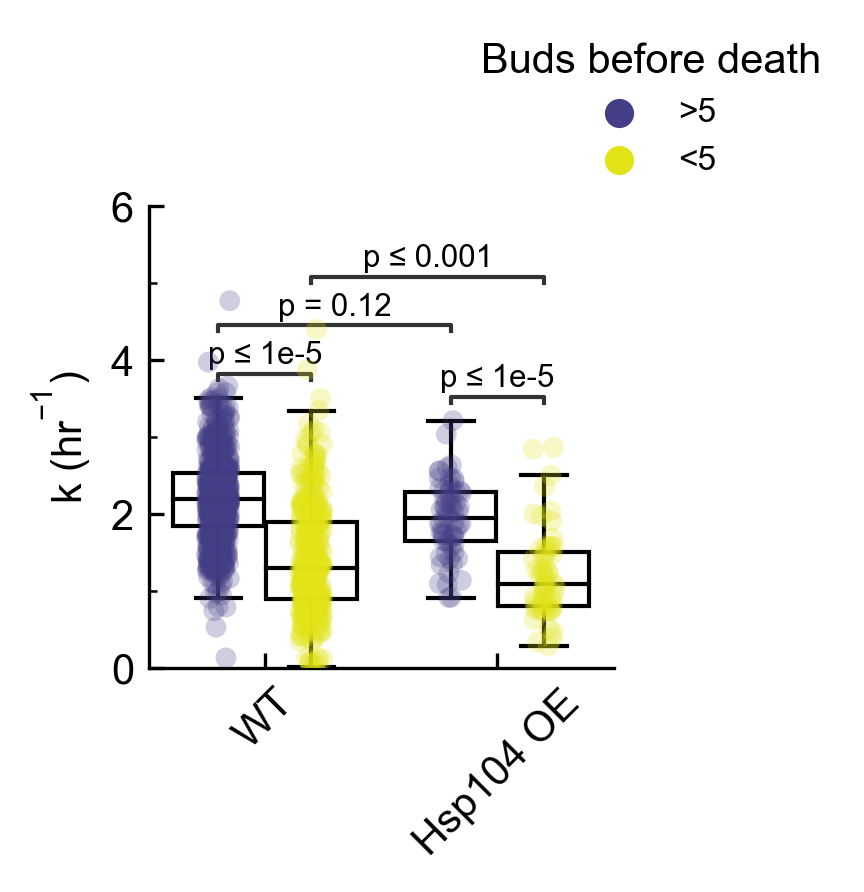

In [5]:
strain_groups = [
    ['JPC121', 'JPC146', 'JPC220'],
    ['JPC262'],
    ['JPC136'],
    ['JPC199'],
    ['JPC193'],
]

strain_groups = [
    ['JPC121', 'JPC146', 'JPC220'],
    ['JPC193'],
]

strains = []
for group in strain_groups:
    for strain in group:
        strains.append(strain)

descs = [
    'WT',
    r'$\it{ubr2}$$\Delta$',
    'Ubr1 OE',
    'Hsp70 OE',
    'Hsp104 OE'
]

descs = [
    'WT',
    'Hsp104 OE'
]

skip_comps = [
     '20221104_byc_JPC136_R-YFP-Su9_UBR1-OE'
]

bound1 = 5
bound2 = 5
fits_df.loc[:, 'post-sep'] = np.nan
fits_df.loc[fits_df.dist_from_sen<bound1, 'post-sep'] = True
fits_df.loc[fits_df.dist_from_sen>bound2, 'post-sep'] = False
subdf = fits_df[fits_df.strain_name.isin(strains)]
subdf = subdf[~subdf.compartment_name.isin(skip_comps)]
for idx, strain_group in enumerate(strain_groups):
    subdf.loc[subdf.strain_name.isin(strain_group), 'condition'] = descs[idx]

for comp in subdf.compartment_name.unique():
    bool1 = subdf['post-sep']==False
    bool2 = subdf.compartment_name==comp

    subdf.loc[bool2, 'b_norm_pre_sep_med'] = subdf.loc[bool2, 'b']/subdf.loc[bool1 & bool2, 'b'].median()
    subdf.loc[bool2, 'b_norm_pre_sep_mean'] = subdf.loc[bool2, 'b']/subdf.loc[bool1 & bool2, 'b'].mean()

fig, ax = plotting.figure_ax(width_scale=1)
fig.set_dpi(300)

stripkwargs = {
    'x': 'condition',
    'y': 'b',
    'hue': 'post-sep',
    'hue_order': [False, True],
    'order': descs,
    'ax': ax,
    'dodge': True,
    'data': subdf,
    'palette': pre_post_SEP_palette,
    'alpha': 0.25
}

boxkwargs = {
    'x': 'condition',
    'y': 'b',
    'data': subdf,
    'hue': 'post-sep',
    'hue_order': [False, True],
    'order': descs,
    'ax': ax,
    'dodge': True,
    'palette': pre_post_SEP_palette,
    'showfliers': False
}
sns.boxplot(**boxkwargs, **plotting.transparent_boxes_prop_dict)
plt.xticks(rotation=45)

# annotate t-test results
data=stripkwargs['data']
x = stripkwargs['x']
y = stripkwargs['y']
hue = stripkwargs['hue']
order = stripkwargs['order']
box_pairs=[
    (('WT', True), ("WT", False)),
    ((r'$\it{ubr2}$$\Delta$', True), (r'$\it{ubr2}$$\Delta$', False)),
    (('Ubr1 OE', True), ("Ubr1 OE", False)),
    (('Hsp70 OE', True), ("Hsp70 OE", False)),
    (('Hsp104 OE', True), ("Hsp104 OE", False)),
]

box_pairs=[
    (('WT', True), ("WT", False)),
    (('Hsp104 OE', True), ("Hsp104 OE", False)),    
    (('Hsp104 OE', True), ("WT", True)),    
    (('Hsp104 OE', False), ("WT", False)),
]
test='Mann-Whitney'
text_format="simple"
loc="inside"

from statannotations.Annotator import Annotator
annotator = Annotator(ax, box_pairs, hue=hue, data=data, x=x, y=y, order=order,)
annotator.configure(test=test, text_format=text_format,
                    loc=loc, show_test_name=False,
                    line_width=1, fontsize=7.5,
                   comparisons_correction="bonferroni",)
annotator.apply_and_annotate()

sns.stripplot(**stripkwargs)
ax.set_ylim(0, 6)
ax.set_xticklabels(descs)
ax.set_xlabel('')
ax.set_ylabel(plotting.annoying_strings().k_inverse_hrs)
plotting.format_ticks(ax, add_minor_x=False)
ax.legend(ax.get_legend_handles_labels()[0][2:5], ['>5', '<5'],
          frameon=False,
          title='Buds before death',
          bbox_to_anchor=(0.65, 1),
          fontsize=8)

filetype = '.png'
strainnames = '-'.join(strains)
savepath = os.path.join(constants.byc_data_dir, f'meta/plots/fig2_{strainnames}_pre-post-SEP_summary{filetype}')
savepath = os.path.abspath(savepath)
fig.savefig(savepath)
print(f'Saved figure at \n{savepath}')

# Save above data so it can be read into R for final stats
subdf.loc[: ,'post'] = subdf['post-sep']
subdf.to_csv(os.path.join(constants.byc_data_dir, 'subdf.csv'), index=False)



$\it{ubr2}$$\Delta$_True vs. $\it{ubr2}$$\Delta$_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.079e-01 U_stat=5.073e+03
WT_True vs. WT_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.903e-61 U_stat=4.231e+04
WT_True vs. $\it{ubr2}$$\Delta$_True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.467e+04
WT_False vs. $\it{ubr2}$$\Delta$_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.846e-36 U_stat=7.765e+04
Saved figure at 
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\fig2_JPC121-JPC146-JPC220-JPC262_pre-post-SEP_summary.png


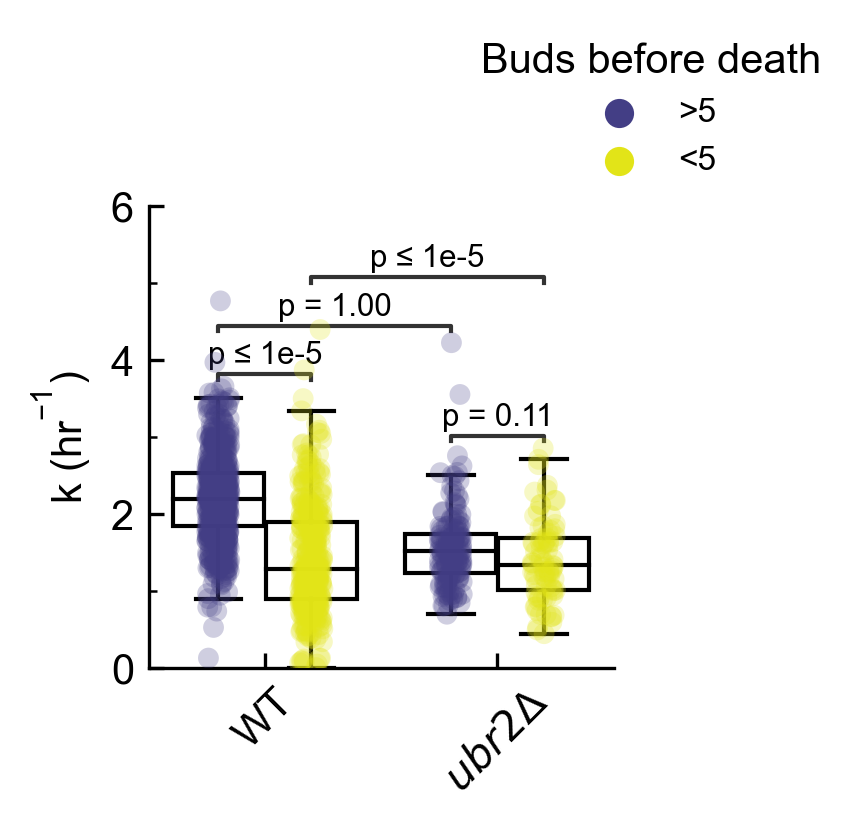

In [11]:
strain_groups = [
    ['JPC121', 'JPC146', 'JPC220'],
    ['JPC262'],
    ['JPC136'],
    ['JPC199'],
    ['JPC193'],
]

strain_groups = [
    ['JPC121', 'JPC146', 'JPC220'],
    ['JPC262'],
]

strains = []
for group in strain_groups:
    for strain in group:
        strains.append(strain)

descs = [
    'WT',
    r'$\it{ubr2}$$\Delta$',
    'Ubr1 OE',
    'Hsp70 OE',
    'Hsp104 OE'
]

descs = [
    'WT',
    plotting.get_gene_deletion_string('ubr2')
]

skip_comps = [
     '20221104_byc_JPC136_R-YFP-Su9_UBR1-OE'
]

bound1 = 5
bound2 = 5
fits_df.loc[:, 'post-sep'] = np.nan
fits_df.loc[fits_df.dist_from_sen<bound1, 'post-sep'] = True
fits_df.loc[fits_df.dist_from_sen>bound2, 'post-sep'] = False
subdf = fits_df[fits_df.strain_name.isin(strains)]
subdf = subdf[~subdf.compartment_name.isin(skip_comps)]
for idx, strain_group in enumerate(strain_groups):
    subdf.loc[subdf.strain_name.isin(strain_group), 'condition'] = descs[idx]

for comp in subdf.compartment_name.unique():
    bool1 = subdf['post-sep']==False
    bool2 = subdf.compartment_name==comp

    subdf.loc[bool2, 'b_norm_pre_sep_med'] = subdf.loc[bool2, 'b']/subdf.loc[bool1 & bool2, 'b'].median()
    subdf.loc[bool2, 'b_norm_pre_sep_mean'] = subdf.loc[bool2, 'b']/subdf.loc[bool1 & bool2, 'b'].mean()

fig, ax = plotting.figure_ax(width_scale=1)
fig.set_dpi(300)

stripkwargs = {
    'x': 'condition',
    'y': 'b',
    'hue': 'post-sep',
    'hue_order': [False, True],
    'order': descs,
    'ax': ax,
    'dodge': True,
    'data': subdf,
    'palette': pre_post_SEP_palette,
    'alpha': 0.25
}

boxkwargs = {
    'x': 'condition',
    'y': 'b',
    'data': subdf,
    'hue': 'post-sep',
    'hue_order': [False, True],
    'order': descs,
    'ax': ax,
    'dodge': True,
    'palette': pre_post_SEP_palette,
    'showfliers': False
}
sns.boxplot(**boxkwargs, **plotting.transparent_boxes_prop_dict)
plt.xticks(rotation=45)

# annotate t-test results
data=stripkwargs['data']
x = stripkwargs['x']
y = stripkwargs['y']
hue = stripkwargs['hue']
order = stripkwargs['order']
box_pairs=[
    (('WT', True), ("WT", False)),
    ((r'$\it{ubr2}$$\Delta$', True), (r'$\it{ubr2}$$\Delta$', False)),
    (('Ubr1 OE', True), ("Ubr1 OE", False)),
    (('Hsp70 OE', True), ("Hsp70 OE", False)),
    (('Hsp104 OE', True), ("Hsp104 OE", False)),
]

box_pairs=[
    (('WT', True), ("WT", False)),
    ((plotting.get_gene_deletion_string('ubr2'), True), (plotting.get_gene_deletion_string('ubr2'), False)),    
    (('WT', True), (plotting.get_gene_deletion_string('ubr2'), True)),    
    (('WT', False), (plotting.get_gene_deletion_string('ubr2'), False)),
]
test='Mann-Whitney'
text_format="simple"
loc="inside"

from statannotations.Annotator import Annotator
annotator = Annotator(ax, box_pairs, hue=hue, data=data, x=x, y=y, order=order,)
annotator.configure(test=test, text_format=text_format,
                    loc=loc, show_test_name=False,
                    line_width=1, fontsize=7.5,
                   comparisons_correction="bonferroni",)
annotator.apply_and_annotate()

sns.stripplot(**stripkwargs)
ax.set_ylim(0, 6)
ax.set_xticklabels(descs)
ax.set_xlabel('')
ax.set_ylabel(plotting.annoying_strings().k_inverse_hrs)
plotting.format_ticks(ax, add_minor_x=False)
ax.legend(ax.get_legend_handles_labels()[0][2:5], ['>5', '<5'],
          frameon=False,
          title='Buds before death',
          bbox_to_anchor=(0.65, 1),
          fontsize=8)

filetype = '.png'
strainnames = '-'.join(strains)
savepath = os.path.join(constants.byc_data_dir, f'meta/plots/fig2_{strainnames}_pre-post-SEP_summary{filetype}')
savepath = os.path.abspath(savepath)
fig.savefig(savepath)
print(f'Saved figure at \n{savepath}')

# Save above data so it can be read into R for final stats
subdf.loc[: ,'post'] = subdf['post-sep']
subdf.to_csv(os.path.join(constants.byc_data_dir, 'subdf.csv'), index=False)



## Logistic fits analysis

### Fit and plot each strain of interest

In [58]:
len(buds_df[buds_df.strain_name=='JPC193'].celldex.unique())

102

Saved logistic fit results at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\JPC121_logistic-fit_b-vs-dist-from-sen.csv
Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\x=dist_from_sen_y=k and cycle duration_strains=JPC121-JPC146-JPC220.svg
Saved logistic fit results at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\JPC199_logistic-fit_b-vs-dist-from-sen.csv
Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\x=dist_from_sen_y=k and cycle duration_strains=JPC199.svg
Saved logistic fit results at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\JPC193_logistic-fit_b-vs-dist-from-sen.csv
Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\x=dist_from_sen_y=k and cycle duration_strains=JPC193.svg
Saved logistic fit results at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\JPC262_logistic-fit_b-vs-dist-from-sen.csv
Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\x=dist_from_sen_y=k and cycle duration_strains=JPC262.svg
Saved 

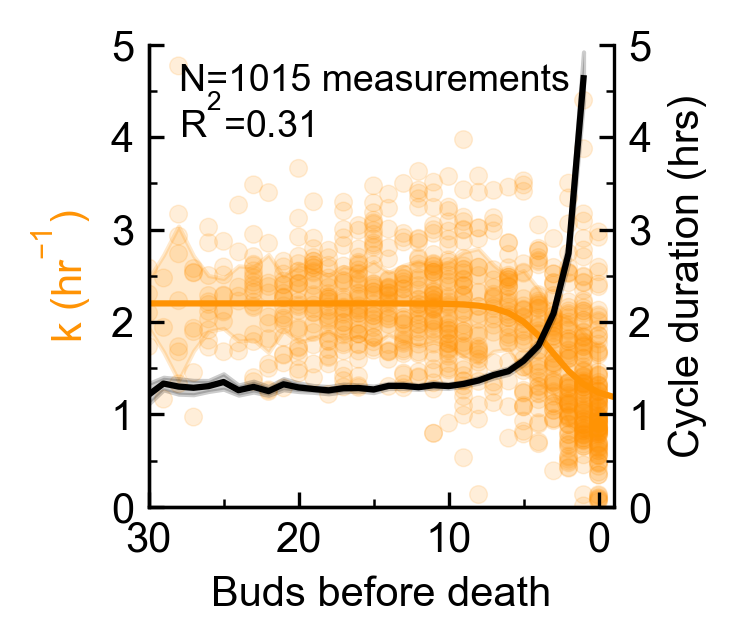

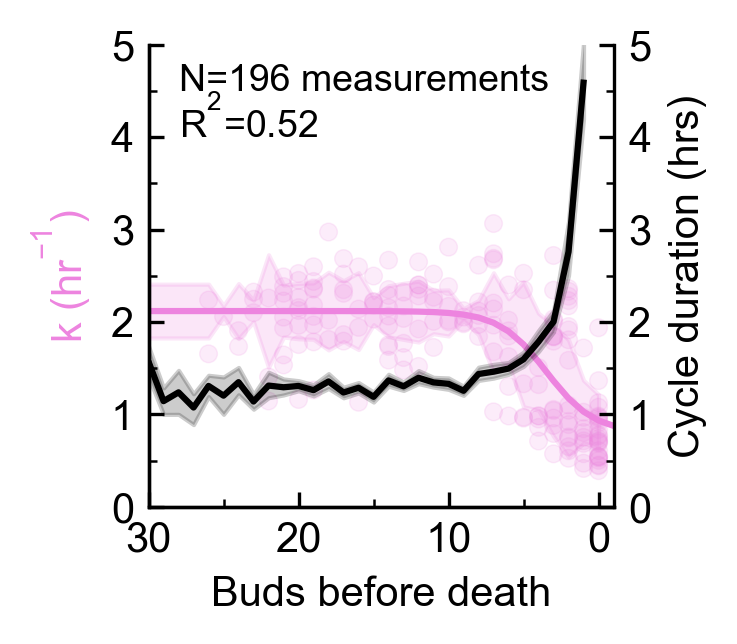

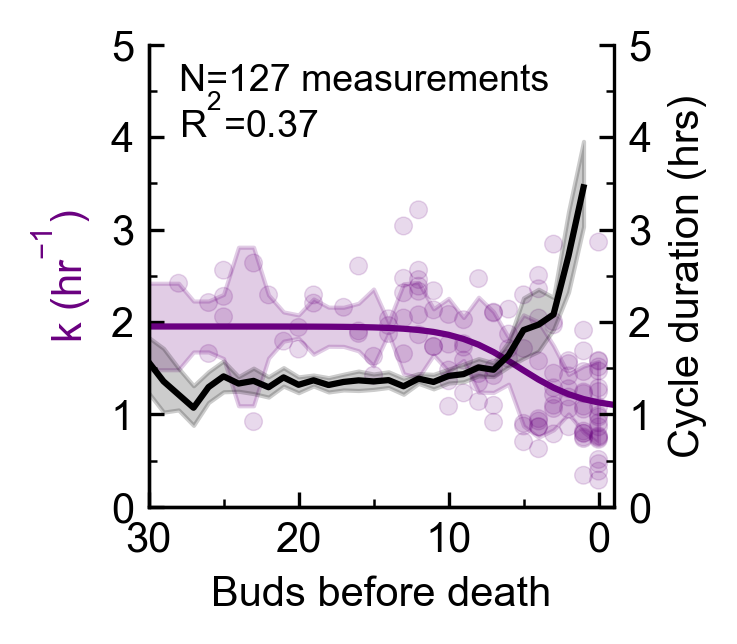

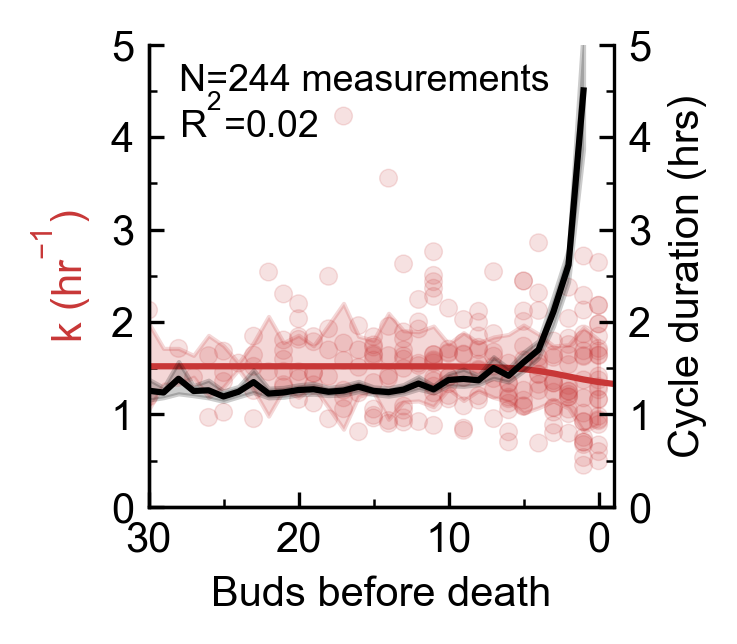

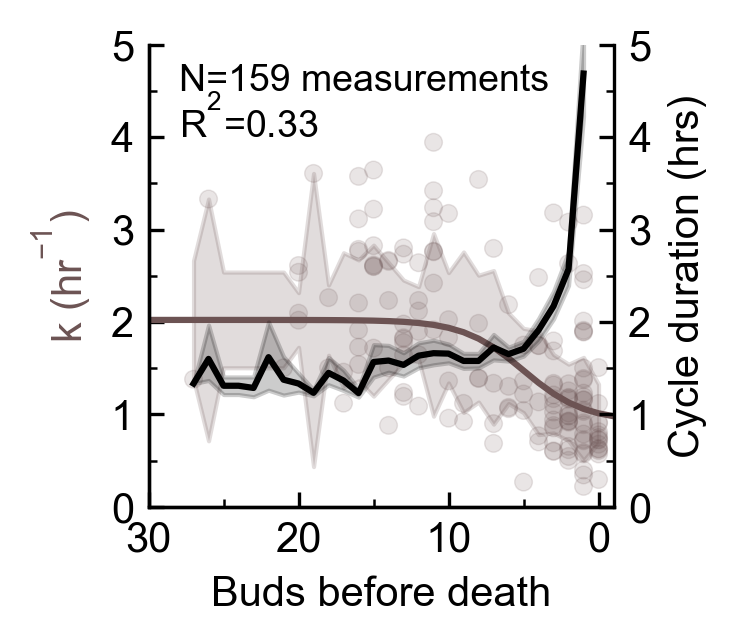

In [10]:
reload(fitting_tools)

strain_groups = [
    ['JPC121', 'JPC146', 'JPC220'],
    ['JPC199'],
    ['JPC193'],
    ['JPC262'],
    ['JPC136']
]

for strains in [strain_groups[i] for i in range(len(strain_groups))]:

    skip_comps = [
         '20221104_byc_JPC136_R-YFP-Su9_UBR1-OE',
         '20230201_byc_JPC228-20230127-int_UBL-YFP-Su9x3_BY4741_rfp'
    ]

    pre_load_vortex = False
    blue_light_exposed = False

    sub_fits_df = fits_df[fits_df.strain_name.isin(strains)]
    # sub_fits_df = sub_fits_df[sub_fits_df['tet_stock_concn']=='1000X']
    # sub_fits_df = sub_fits_df[sub_fits_df['pre-load-vortex']==pre_load_vortex]
    # sub_fits_df = sub_fits_df[sub_fits_df['potential_blue_light_exposure_during_filter_cube_switching']==blue_light_exposed]
    sub_fits_df = sub_fits_df[sub_fits_df.dist_from_sen>=0]
    sub_fits_df = sub_fits_df[~sub_fits_df.b.isna()]
    sub_fits_df = sub_fits_df[~sub_fits_df.compartment_name.isin(skip_comps)]
    sub_bud_df = buds_df[buds_df.strain_name.isin(strains)]
    # sub_bud_df = sub_bud_df[sub_bud_df['tet_stock_concn']=='1000X']
    # sub_bud_df = sub_bud_df[sub_bud_df['pre-load-vortex']==pre_load_vortex]
    # sub_bud_df = sub_bud_df[sub_bud_df['potential_blue_light_exposure_during_filter_cube_switching']==blue_light_exposed]
    sub_bud_df = sub_bud_df[~sub_bud_df.compartment_name.isin(skip_comps)]

    ratecolor = strains_color_dict[strains[0]]
    postsep_border = 5
    fit_type = 'logistic'
    xlim = (30, -1)
    ylim = (0, 5)
    shade_stderr = True
    fillalpha = 0.25
    fillsep = False
    daughter_shape='All'
    fig, ax = plotting.figure_ax(width_scale=1)
    fig.set_dpi(300)
    yvar1 = 'b'
    yvar2 = 'cycle_duration_hrs'
    xvar = 'dist_from_sen'
    alpha = 0.15
    size = 15
    fontsize=10
    ylabel1 = 'Cycle duration (hrs)'
    ylabel2 = 'k (hr$^{-1}$)'
    xlabel = 'Buds before death'
    if fillsep:
        # Shade post-SEP area
        xfill = np.arange(-1, postsep_border, 0.5)
        ax.fill_between(
            xfill,
            np.full(len(xfill), np.max(ylim)),
            color=pre_post_SEP_palette[1],
            alpha=fillalpha,
            edgecolor=None)
        # Shade post-SEP area
        xfill = np.arange(postsep_border + 0.5, np.max(xlim) + 0.5, 0.5)
        ax.fill_between(
            xfill,
            np.full(len(xfill), np.max(ylim)),
            color=pre_post_SEP_palette[0],
            alpha=fillalpha,
            edgecolor=None)

    if fit_type=='logistic':
        # fit to logistic
            fitsdf, smoothdf, result = fitting_tools.fit_logistic_to_fits_df(sub_fits_df, return_result=True)
            kernsize = 3
            trace_tools.mean_filter(
                smoothdf,
                'stderr',
                kernsize,
                name_with_kernel=True)  

            params = (fitsdf.L.iloc[0], fitsdf.k.iloc[0], fitsdf.x_center.iloc[0], fitsdf.offset.iloc[0])
            x = np.sort(sub_fits_df[xvar].unique())
            x = np.arange(-10, 40, 1)
            y_pred = fitting_tools.logistic(x, *params)
            ax.plot(x, y_pred, color=ratecolor)

    elif fit_type=='line':
        # Fit to line
        fitsdf, smoothdf, result = fitting_tools.fit_line_to_fits_df(sub_fits_df, return_result=True)
        kernsize = 3
        trace_tools.mean_filter(
            smoothdf,
            'stderr',
            kernsize,
            name_with_kernel=True)  
        x = np.sort(sub_fits_df[xvar].unique())
        params = (fitsdf.m.iloc[0], fitsdf.b.iloc[0])
        y_pred = fitting_tools.line(x, *params)
        ax.plot(x, y_pred, color=ratecolor)

    elif fit_type=='median':
        shade_stderr=False
        sns.lineplot(x=xvar, y=yvar1, data=sub_fits_df, ax=ax, color=ratecolor, estimator='mean')
        # Get stats for 
        x = sub_fits_df.sort_values(by='dist_from_sen', ascending=True)[xvar].unique()
        y_pred = sub_fits_df.sort_values(by='dist_from_sen', ascending=True).loc[:, [xvar, yvar1]].pivot_table(index=[xvar], aggfunc='mean').values
        y_pred = np.reshape(y_pred, len(y_pred))

    else:
        print(f'No fit type <{fit_type}>. Please use either logistic or line')
    # Derive statistics of fit
    r_sq, ydata, ypred = fitting_tools.get_r_sq_with_multi_y_per_x(x, y_pred, sub_fits_df, return_new_y_ypreds=True)
    n = len(sub_fits_df)
    # Shade standard error of the mean for 
    if shade_stderr:
        xvar_fill = 'x_input_smooth'
        yvar_fill = 'y_pred'
        errvar = f'stderr'
        # errvar = f'stderr'

        err_kwargs = {
            'x': smoothdf[xvar_fill],
            'y1': smoothdf[yvar_fill] + smoothdf[errvar],
            'y2': smoothdf[yvar_fill] - smoothdf[errvar]
        }

        kwargs = {
            'x': xvar_fill,
            'y': 'y_pred',
            'data': smoothdf,
            'err_kws': err_kwargs
        }
        ax.fill_between(
            err_kwargs['x'],
            err_kwargs['y1'],
            err_kwargs['y2'],
            color=ratecolor,
            alpha=0.2
            )
    # Format axes
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_xticks(np.arange(0, xlim[0]+1, 10))
    ax.set_ylim(ylim)
    ax.set_yticks(np.arange(0, ylim[1]+0.1, 1))
    ax2 = ax.twinx()
    ax2.set_ylim(ylim)
    ax2.set_yticks(np.arange(0, ylim[1]+0.1, 1))
    # plot cycle durations
    sns.lineplot(x=xvar, y=yvar2, data=sub_bud_df,ax=ax2, color='black')
    # Plot rate constants
    kwargs = {
        'x': xvar,
        'y': yvar1,
        'alpha': alpha,
        'data': sub_fits_df,
        'ax': ax,
        'size': size,
        'color': ratecolor,
        'edgecolor': ratecolor + (0,) #The (0, ) tuple adds alpha to the ratecolor tuple
    }
    sns.scatterplot(**kwargs)
    ax.legend_.set_visible(False)
    # Aesthetics
    plotting.remove_spines(ax)
    plotting.format_ticks(ax)
    plotting.format_ticks(ax2)
    ax2.spines['top'].set_visible(False)

    ax2.set_ylabel(ylabel1, fontsize=fontsize)
    ax.set_ylabel(ylabel2, color=ratecolor, fontsize=fontsize)

    # Annotate stats
    xy_n = (np.max(ax.get_xlim()) - 2, 4.5)
    xy_rsq = (np.max(ax.get_xlim()) - 2, 4.0)
    rsq_str = f'{plotting.annoying_strings().r_sq}={np.round(r_sq, 2)}'
    n_str = f'N={np.round(n, 2)} measurements'
    if fit_type == 'median':
        # Still annotating an R sq. even though the model
        # is just the mean over dist_from_sen
        pass
        # ax.annotate(rsq_str, xy_rsq, fontsize=fontsize-1)
    else:
        ax.annotate(rsq_str, xy_rsq, fontsize=fontsize-1)
    ax.annotate(n_str, xy_n, fontsize=fontsize-1)
    kwargs = {
        'x': 'dist_from_sen',
        'y': 'k and cycle duration',
        'strains': '-'.join(strains)
    }

    plotting.save_figure(fig, kwargs, ext='.svg')

### Read in the logistic fit dfs created above

In [5]:
strains = [
    'JPC121',
    'JPC136',
    'JPC199',
    'JPC193'
]
descs = [
    'WT',
    'Ubr1 OE',
    'Hsp70 OE',
    'Hsp104 OE'
]

datadir = os.path.join(constants.byc_data_dir, 'meta')
basename = 'logistic-fit_b-vs-dist-from-sen.csv'
filenames = [f'{strain}_{basename}' for strain in strains]
filepaths = [os.path.join(datadir, fn) for fn in filenames]

logisticfitdfs = [pd.read_csv(path) for path in filepaths]
alllogfitsdf = pd.concat(logisticfitdfs, sort=False).reset_index()
alllogfitsdf.loc[:, 'overexpression'] = descs

Saved figure at
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\x=overexpression_y=x_center.svg


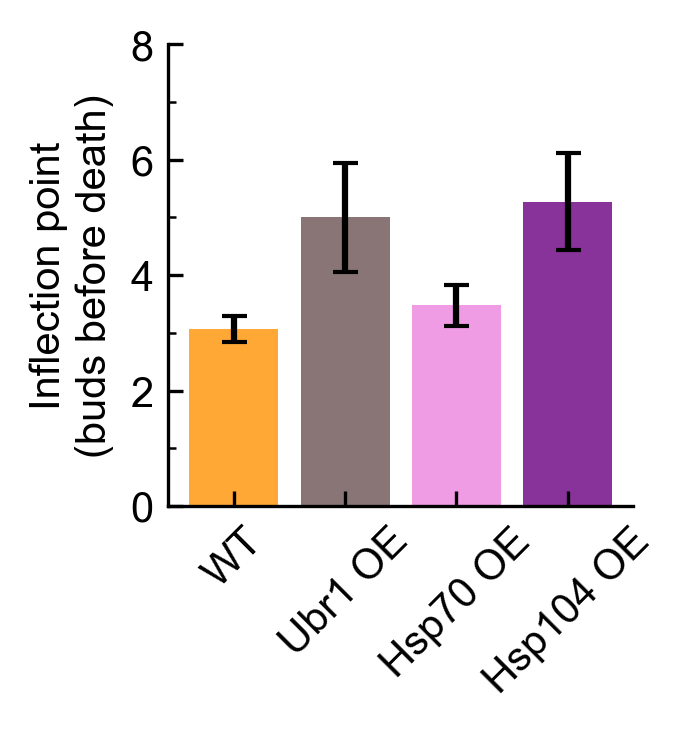

In [6]:
logfitsdf = alllogfitsdf
# logfitsdf = alllogfitsdf[alllogfitsdf.strain_name.isin(['JPC121', 'JPC193'])]

xvar = 'overexpression'
yvar = 'x_center'

kwargs = {
    'x': xvar,
    'y': yvar,
    'order': descs
}

fig, ax = plotting.figure_ax(width_scale=1)
fig.set_dpi(300)
colors = [
    strains_color_dict['JPC121'],
    strains_color_dict['JPC136'],
    strains_color_dict['JPC199'],
    strains_color_dict['JPC193']]
# colors = [
#     strains_color_dict['JPC121'],
#     strains_color_dict['JPC193']]
ax.bar(logfitsdf[xvar], logfitsdf[yvar],
       yerr=logfitsdf[f"{yvar}_stderr"], color=colors,
       ecolor='black', capsize=3, alpha=0.8)
plt.xticks(rotation = 45)
ax.set_ylabel('Inflection point\n(buds before death)', loc='center')
ax.set_ylim(0, 8)
# ax.set_yscale('log', base=2)
plotting.format_ticks(ax, add_minor_x=False)

plotting.save_figure(fig, kwargs, ext='.svg')

### P-value for difference between fit parameters +/- SEM

In [9]:
# Based on this publication: https://www.bmj.com/content/343/bmj.d2304
compare_between = ['JPC121', 'JPC136']
var_to_compare = 'x_center'
SE_of_var = f'{var_to_compare}_stderr'
estimate_1 = alllogfitsdf.loc[alllogfitsdf.strain_name==compare_between[0], var_to_compare].values[0]
estimate_2 = alllogfitsdf.loc[alllogfitsdf.strain_name==compare_between[1], var_to_compare].values[0]
difference_estimate = estimate_1 - estimate_2
stderr_1 = alllogfitsdf.loc[alllogfitsdf.strain_name==compare_between[0], SE_of_var].values[0]
stderr_2 = alllogfitsdf.loc[alllogfitsdf.strain_name==compare_between[1], SE_of_var].values[0]
difference_estimate_stderr = np.sqrt(np.sum([np.power(stderr_1, 2), np.power(stderr_2, 2)]))
z_stat = np.abs(difference_estimate/difference_estimate_stderr)
pval = np.exp(-0.717*z_stat-0.416*np.power(z_stat, 2))
print(f'Estimated pval = {pval} for difference between {compare_between[0]} and {compare_between[1]}')

Estimated pval = 0.04468170319040475 for difference between JPC121 and JPC136


Visualizing the p-value vs. z stat distribution of above

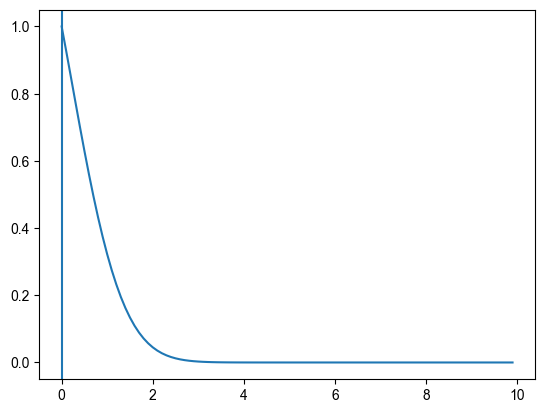

In [16]:
z = np.arange(0, 10, 0.1)
y = np.exp(-0.717*z-0.416*np.power(z, 2))

plt.plot(z, y)
plt.axvline(0)

## Swarmp plot of pre/post SEP k across rescue attempts

$\it{ubr2}$$\Delta$_True vs. $\it{ubr2}$$\Delta$_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.348e-01 U_stat=5.073e+03
WT_True vs. WT_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.629e-61 U_stat=4.231e+04
Hsp104-OE_True vs. Hsp104-OE_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.351e-10 U_stat=5.720e+02
Ubr1-OE_True vs. Ubr1-OE_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.017e-12 U_stat=9.280e+02
Hsp70-OE_True vs. Hsp70-OE_False: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.464e-19 U_stat=9.870e+02
Saved figure at 
C:\Users\johnp\Dropbox\Projects\byc\data\meta\plots\fig2_JPC121-JPC146-JPC220-JPC262-JPC193-JPC136-JPC199_pre-post-SEP_summary.svg


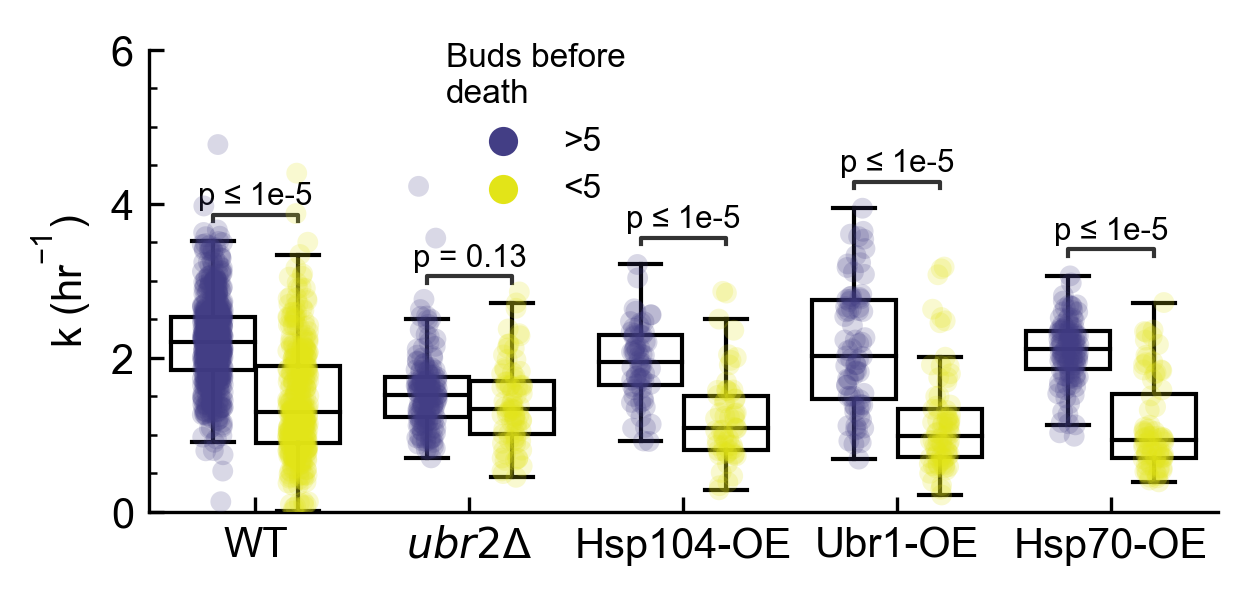

In [33]:
from statannotations.Annotator import Annotator
strain_groups = [
    ['JPC121', 'JPC146', 'JPC220'],
    ['JPC262'],
    ['JPC193'],
    ['JPC136'],
    ['JPC199'],
]
# expand out individual strain names
strains = []
for group in strain_groups:
    for strain in group:
        strains.append(strain)
conditions = [
    'WT',
    plotting.get_gene_deletion_string('ubr2'),
    'Hsp104-OE',
    'Ubr1-OE',
    'Hsp70-OE'
]
skip_comps = [
     '20221104_byc_JPC136_R-YFP-Su9_UBR1-OE',
     '20230201_byc_JPC228-20230127-int_UBL-YFP-Su9x3_BY4741_rfp'
]

bound1 = 5
bound2 = 5
fits_df.loc[:, 'post-sep'] = np.nan
fits_df.loc[fits_df.dist_from_sen<bound1, 'post-sep'] = True
fits_df.loc[fits_df.dist_from_sen>bound2, 'post-sep'] = False

subdf = fits_df.loc[fits_df.strain_name.isin(strains)]
subdf = subdf.loc[~subdf.compartment_name.isin(skip_comps), :]
for i, group in enumerate(strain_groups):
    subdf.loc[subdf.strain_name.isin(group), 'condition'] = conditions[i]


fig, ax = plotting.figure_ax(width_scale=2.3)
fig.set_dpi(300)

stripkwargs = {
    'x': 'condition',
    'y': 'b',
    'hue': 'post-sep',
    'hue_order': [False, True],
    'order': conditions,
    'ax': ax,
    'dodge': True,
    'data': subdf,
    'palette': pre_post_SEP_palette,
    'alpha': 0.2
}

boxkwargs = {
    'x': 'condition',
    'y': 'b',
    'data': subdf,
    'hue': 'post-sep',
    'hue_order': [False, True],
    'order': conditions,
    'ax': ax,
    'dodge': True,
    'palette': pre_post_SEP_palette,
    'showfliers': False
}
sns.boxplot(**boxkwargs, **plotting.transparent_boxes_prop_dict)

ax.set_xticklabels(conditions)
ax.set_xlabel('')
ax.set_ylabel(plotting.annoying_strings().k_inverse_hrs)
ax.legend(ax.get_legend_handles_labels()[0][2:4], ['>5 buds befored death', '<5 buds before death'],
          frameon=False,
          title='',
          bbox_to_anchor=(0.6, 1))

# plt.xticks(rotation=45)

# annotate t-test results
data=stripkwargs['data']
x = stripkwargs['x']
y = stripkwargs['y']
hue = stripkwargs['hue']
order = stripkwargs['order']
box_pairs=[
    ((conditions[0], True), (conditions[0], False)),
    ((conditions[1], True), (conditions[1], False)),
    ((conditions[2], True), (conditions[2], False)),
    ((conditions[3], True), (conditions[3], False)),
    ((conditions[4], True), (conditions[4], False))
]

box_pairs = box_pairs
test='Mann-Whitney'
text_format="simple"
loc="inside"

annotator = Annotator(ax, box_pairs, hue=hue, data=data, x=x, y=y, order=order,)
annotator.configure(test=test, text_format=text_format,
                    loc=loc, show_test_name=False,
                    line_width=1, fontsize=7.5,
                    comparisons_correction="bonferroni")
annotator.apply_and_annotate()

sns.stripplot(**stripkwargs)
ax.set_ylim(0, 6)
legend = ax.legend(ax.get_legend_handles_labels()[0][2:4], ['>5', '<5'], title='Buds before\ndeath', fontsize=8, frameon=False,
                  bbox_to_anchor=(0.25, 0.6))
legend.get_title().set_fontsize(8)
ax.set_xlabel('')
plotting.format_ticks(ax, add_minor_x=False, yminorspace=0.5)
filetype = '.svg'
strainnames = '-'.join(strains)
savepath = os.path.join(constants.byc_data_dir, f'meta/plots/fig2_{strainnames}_pre-post-SEP_summary{filetype}')
savepath = os.path.abspath(savepath)
fig.savefig(savepath)
print(f'Saved figure at \n{savepath}')

# Save subdf so it can be analyzed in R
subdf.to_csv(os.path.join(constants.byc_data_dir, 'subdf_wt_vs_rpn4_across_substrates.csv'), index=False)

## Survival in different rescue attempts

In [11]:
wanted_compartments = [
       '20211008_byc_JPC146_UbiR-YFP-Su9_BY4741',
       '20220915_byc_JPC193_R-YFP-Su9_HSP104-OE',
       '20221019_byc_JPC228_UBL-YFP-Su9_full',
       '20221028_byc_JPC228_DsRed-P2A-UBL-YFP-Su9_3x-int',
       '20221104_byc_JPC199_R-YFP-Su9_SSA1-OE',
       '20221104_byc_JPC220_R-YFP-Su9_Hsp104-mCherry',
       '20221118_byc_JPC220_R-YFP-Su9_Hsp104-mCherry',
       '20221201_byc_JPC146_R-YFP-Su9_low-expr',
       '20221201_byc_JPC220_R-YFP-Su9_HSP104-mCherry',
       '20221215_byc_JPC193_R-YFP-Su9_HSP104-OE',
       '20220211_byc_JPC157_ubr2d_rls_expt',
       '20230324_byc_JPC136_R-YFP-Su9_Ubr1-OE'
]

conditions = [
    'WT',
    'Hsp104-OE',
    'WT',
    'WT',
    'Ssa1-OE',
    'WT',
    'WT',
    'WT',
    'WT',
    'Hsp104-OE',
    plotting.get_gene_deletion_string('ubr2'),
    'Ubr1-OE'
    
]

In [12]:
reload(sa)

def get_survival_bud_mdf(compartment_name, descriptor=None):
    exptname = compartment_name[0:8] + '_byc'
    compartmentdir = files.get_byc_compartmentdir(exptname, compartment_name)
    # Read in the data
    file_pattern = constants.patterns.bud_roi_df_file
    mdf_type='bud_rois'
    bud_mdf, path = files.mdf_from_file_pattern(compartmentdir, file_pattern, mdf_type=mdf_type)
    bud_mdf.loc[:,'bud_rois_path'] = bud_mdf.bud_roi_set_path
    bud_mdf.loc[:,'abs_chase_frame']=0
    bud_mdf.loc[:, 'compartment_name'] = compartment_name
    bud_mdf = sa.annotate_buds(bud_mdf, bud_mdf)
    if descriptor:
        bud_mdf.loc[:, 'condition'] = descriptor
    
    return bud_mdf

In [15]:
# %%capture printout
bud_mdfs = []
reload(sa)
for i, compartment_name in enumerate(wanted_compartments):
    bud_mdf = get_survival_bud_mdf(compartment_name, descriptor = conditions[i])
    
    bud_mdfs.append(bud_mdf)

Found 74 potential bud_rois roi df .csv files
Adding relative path to mdf
Saved master index df at:
C:\Users\johnp\Dropbox\Projects\byc\data/20211008_byc\20211008_byc_JPC146_UbiR-YFP-Su9_BY4741_bud_rois.csv
Annotating bud appearance frames for cell 0
Found absolute chase frame of 0
death observed for cell 0
Read in bud_roi_set at
C:\Users\johnp\Dropbox\Projects\byc\data/20211008_byc\20211008_byc_JPC146_UbiR-YFP-Su9_BY4741\20211008_byc_cell000_bud_rois.zip
Gen. from senescence = 2
Set value for dist_from_sen 2
Final dist from sen=2.0
Annotating bud appearance frames for cell 1
Found absolute chase frame of 0
death observed for cell 1
Read in bud_roi_set at
C:\Users\johnp\Dropbox\Projects\byc\data/20211008_byc\20211008_byc_JPC146_UbiR-YFP-Su9_BY4741\20211008_byc_cell001_bud_rois.zip
Gen. from senescence = 18
Set value for dist_from_sen 18
Final dist from sen=18.0
Annotating bud appearance frames for cell 2
Found absolute chase frame of 0
death observed for cell 2
Read in bud_roi_set at
C

In [264]:
allbudsdf = pd.concat(bud_mdfs, ignore_index=True, sort=False)
# Make sure that escape annotation is properly set. Sometimes
# if a single cell escapes it'll only be recorded properly in
# one of the bud_roi_df .csvs
for bud_id in allbudsdf.bud_id.unique():
    if len(allbudsdf[allbudsdf.bud_id==bud_id]) > 1:
        if 'escape' in allbudsdf.loc[allbudsdf.bud_id==bud_id, 'end_event_type'].values:
            allbudsdf.loc[allbudsdf.bud_id==bud_id, 'end_event_type'] = 'escape'
        elif 'sen' in allbudsdf.loc[allbudsdf.bud_id==bud_id, 'end_event_type'].values:
            allbudsdf.loc[allbudsdf.bud_id==bud_id, 'end_event_type'] = 'sen'
            
# Aggregate the data so it can be properly fit with KMF
aggdex = [
    'bud_id',
    'condition',
    'compartment_name',
    'end_event_type',
    'observed_since_start'
    
]
wanted_cols = [
    'rls',
]

include_cols = aggdex + wanted_cols
cell_table_rls_suitable = allbudsdf.loc[:, include_cols].pivot_table(index=aggdex, aggfunc=np.median).reset_index()

In [265]:
found_buds_dfs = []
end_event_types = []
survival_fit_dfs = []

for OE in cell_table_rls_suitable.condition.unique():
    
    try: 
        modedf = cell_table_rls_suitable[cell_table_rls_suitable.condition==OE]
        # Cannot compute survival curves if 0 length RLS in data
        modedf = modedf[modedf.rls!=0]
        n_cells = len(modedf)
        survival_df = fitting_tools.annotate_mdf_censors(modedf)
        survival_fit = fitting_tools.survival_fit(survival_df)
        d = {
            'generations_kmf': [np.float64(val) for val in survival_fit['x_kmf']],
            'fraction_surviving_kmf': [np.float64(val) for val in survival_fit['y_kmf']],
            'halflife_kmf': np.full(len(survival_fit['x_kmf']), survival_fit['kmf_halflife']),
            'n_cells': np.full(len(survival_fit['x_kmf']), n_cells)
        }
        survival_fit_df = pd.DataFrame(d)
        fitting_tools.add_conf_interval_to_survival_fit_df(survival_fit_df, survival_fit)
        for col in modedf.columns:
            if col not in survival_fit_df.columns:
                survival_fit_df.loc[:, col] = modedf[col].iloc[0]

        survival_fit_dfs.append(survival_fit_df)
    except Exception as e:
        print(f'Could not fit survival with following error:\n{e}')

survival_df = pd.concat(survival_fit_dfs, sort=False)
survival_df.index = range(0, len(survival_df))

C:\Users\johnp\Dropbox\Projects\venvs\.byc\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\johnp\Dropbox\Projects\venvs\.byc\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\johnp\Dropbox\Projects\venvs\.byc\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserW

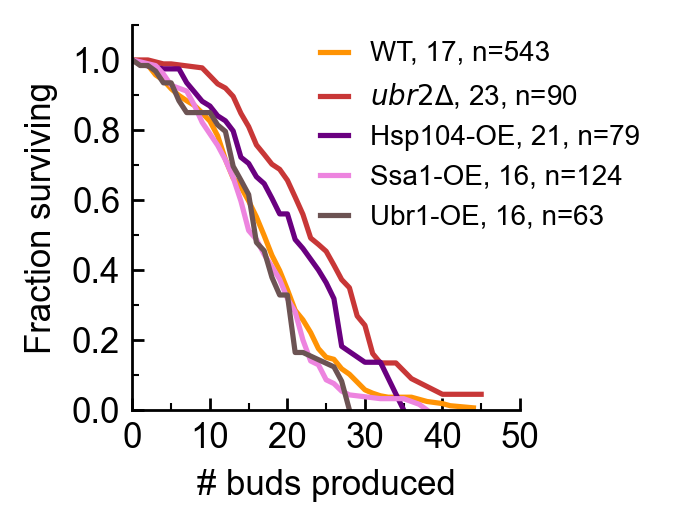

In [301]:
fig, ax = plotting.figure_ax()
colors = [
    strains_color_dict['JPC121'],
    strains_color_dict['JPC262'],
    strains_color_dict['JPC193'],
    strains_color_dict['JPC199'],
    strains_color_dict['JPC136']]

descs = [
    'WT',
    plotting.get_gene_deletion_string('ubr2'),
    'Hsp104-OE',
    'Ssa1-OE',
    'Ubr1-OE'
]
kwargs = {
    'x': 'generations_kmf',
    'y': 'fraction_surviving_kmf',
    'hue': 'condition',
    'ax': ax,
    'data': survival_df,
    'palette': colors,
    'hue_order': descs
}

sns.lineplot(**kwargs)

ax.set_xlim(0, 50)
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(0, 51, 10))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plotting.format_ticks(ax)
ax.set_ylabel('Fraction surviving')
ax.set_xlabel('# buds produced')
labels = []
for condition in descs:
    condition_booldex = survival_df.condition==condition
    n_cells = survival_df[condition_booldex].n_cells.iloc[0]
    kmf_halflife = int(survival_df[condition_booldex].halflife_kmf.iloc[0])
    label = f'{condition}, {kmf_halflife}, n={n_cells}'
    labels.append(label)
handles = ax.get_legend_handles_labels()[0]
# for line in handles:
#     line.set_lw(1)
ax.legend(handles, labels, fontsize=8, title='', frameon=False, handlelength=1, bbox_to_anchor=(0.42, 0.4))

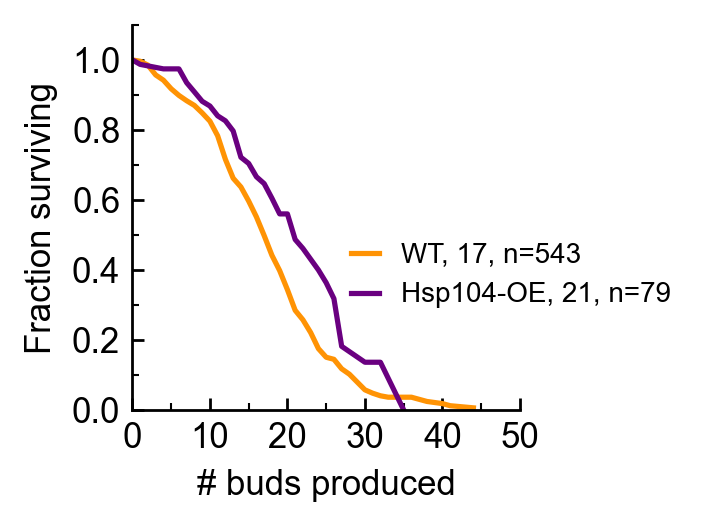

In [315]:
fig, ax = plotting.figure_ax()
colors = [
    strains_color_dict['JPC121'],
    strains_color_dict['JPC193']
]
descs = [
    'WT',
    'Hsp104-OE'
]
kwargs = {
    'x': 'generations_kmf',
    'y': 'fraction_surviving_kmf',
    'hue': 'condition',
    'ax': ax,
    'data': survival_df,
    'palette': colors,
    'hue_order': descs
}

sns.lineplot(**kwargs)

ax.set_xlim(0, 50)
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(0, 51, 10))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plotting.format_ticks(ax)
ax.set_ylabel('Fraction surviving')
ax.set_xlabel('# buds produced')
labels = []
for condition in descs:
    condition_booldex = survival_df.condition==condition
    n_cells = survival_df[condition_booldex].n_cells.iloc[0]
    kmf_halflife = int(survival_df[condition_booldex].halflife_kmf.iloc[0])
    label = f'{condition}, {kmf_halflife}, n={n_cells}'
    labels.append(label)
handles = ax.get_legend_handles_labels()[0]
# for line in handles:
#     line.set_lw(1)
ax.legend(handles, labels, fontsize=8, title='', frameon=False, handlelength=1, bbox_to_anchor=(0.5, 0.5))